# Глубокое обучение


## Тема 3. Генеративно-состязательные сети (GAN) 

В 2014 году Ян Гудфеллоу с соавторами представили на конференции Neural Information Processing Systems (NeurIPS) доклад под названием «Generative Adversarial Nets». Внедрение генеративно-состязательных сетей сейчас рассматривается как ключевой поворотный момент в истории генеративного моделирования, поскольку основные идеи, представленные в этой работе, породили некоторые наиболее успешные и впечатляющие генеративные модели из когда-либо созданных.

### Математические предпосылки GAN

Предположим, мы хотим получить выборку из нормального распределения со средним значением $\mu$ и дисперсией $\sigma^{2}$. Если у нас есть выборка из стандартного нормального распределения $\varepsilon\sim\mathcal{N}\left(0,\,1\right)$, то можно легко показать, что $\mu+\sigma\,\varepsilon\sim\mathcal{N}\left(\mu,\,\sigma^{2}\right)$. Это простой пример отображаемого (продвигаемого) распределения (pushforward distribution). Если $g\left(x\right)=\mu+\sigma\,x$ и $\varepsilon\sim\mathcal{N}\left(0,\,1\right)$, то $g\left(\varepsilon\right)\sim\mathcal{N}\left(\mu,\,\sigma^{2}\right)$ – функция $g$ «отображает» распределение $\mathcal{N}\left(0,\,1\right)$ на своей области определения в распределение $\mathcal{N}\left(\mu,\,\sigma^{2}\right)$ на своей области определения.

На этой простой идее основаны генеративно-состязательные сети (GAN). Предположим, мы хотим получить выборку из некоторого сложного распределения $p\left(x\right).$ Для заданной скрытой случайной переменной $z\sim q$, где $q$ – некоторое простое распределение типа $\mathcal{N}\left(0,\,I\right)$, мы подгоняем параметры $\theta$ функции $g_{\theta}:\mathcal{Z}\rightarrow\mathcal{X}$ так, чтобы случайная величина $g_{\theta}\left(z\right)$ имела примерно то же распределение, что и $p$. Функция $g_{\theta}$ обычно задается нейронной сетью-генератором.

#### Отображаемые распределения

Отображаемые распределения обычно используются в численных вычислениях как средство для создания выборок из одного распределения по выборкам из другого распределения. Например, предположим, что имеется программный пакет, который генерирует псевдослучайные выборки из равномерного распределения на $\left[0,\,1\right]$, но требуются выборки из распределения $p$ с кумулятивной функцией распределения (CDF), заданной как $F:\mathbb{R}\rightarrow\left[0,\,1\right]$. Определим обратную CDF как

$$F^{-1}\left(u\right)=\inf\left\{ x:F\left(x\right)\geqslant u\right\}.$$

Если случайная величина $u$ имеет равномерное распределение на $\left[0,\,1\right]$, т.е. $u\sim\mathrm{Uniform}\left(\left[0,\,1\right]\right)$, то отсюда следует, что случайная величина $F^{-1}\left(u\right)$ имеет распределение $p$ (или $F^{-1}\left(u\right)\sim p$), так как

$$\Pr\left[F^{-1}\left(u\right)\leqslant x\right]=\Pr\left[u\leqslant F\left(x\right)\right]=F\left(x\right).$$

Здесь $\Pr\left[A\right]$ обозначает вероятность события $A$. 

Этот метод называется методом обратного преобразования или выборкой с обратным преобразованием (inverse transform sampling) и основан на наблюдении, что отображение равномерного распределения при помощи обратной CDF распределения $p$ имеет распределение $p$. Более специализированные генераторы выборок, такие как преобразование Бокса-Мюллера и прием Гамбеля-Макса, также основаны на принципе отображения.

Общая идея отображения распределения состоит в том, что при заданном распределении в измеримом пространстве $\mathcal{Z}$ измеримая функция $g:\mathcal{Z}\rightarrow\mathcal{X}$ индуцирует распределение на $\mathcal{X}$. Это распределение определяется для любого измеримого множества $A\subset\mathcal{X}$ формулой

$$\Pr\left[A\right]\equiv\Pr\left[g^{-1}\left(A\right)\right].$$

Если распределение на $\mathcal{Z}$ абсолютно непрерывно, то последнюю вероятность можно разложить как интеграл по плотности $\rho\left(z\right)$. Делая замену переменной от $z$ к $x$, получаем, что

$$\Pr\left[g^{-1}\left(A\right)\right]=\intop_{g^{-1}\left(A\right)}\rho\left(z\right)dz=\intop_{A}\rho\left(g^{-1}\left(x\right)\right)\left|\nabla_{x}g^{-1}\left(x\right)\right|dx$$

Следовательно, плотность исходного распределения $\rho\left(z\right)$ преобразуется в плотность отображаемого распределения $p_{g}\left(x\right)$, определяемую формулой

$$p_{g}\left(x\right)\equiv\rho\left(g^{-1}\left(x\right)\right)\left|\nabla_{x}g^{-1}\left(x\right)\right|$$

#### Обучение отображаемого распределения

Пусть дан конечный набор данных (выборка) $x_{1},...,x_{n}\sim p$ и имеется доступ к неограниченному числу точек $z\sim q$, наша цель состоит в том, чтобы обучить параметризованную функцию $g_{\theta}:\mathcal{Z}\rightarrow\mathcal{X}$ так, чтобы $g_{\theta}\left(z\right)$ было распределено примерно как $p\left(x\right)$. Для любого набора параметров $\theta$ имеем $g_{\theta}\left(z\right)\sim p_{\theta}$, где $p_{\theta}\left(x\right)$ — отображаемое распределение, индуцированное функцией $g_{\theta}$. Итак, еще один способ сформулировать нашу цель состоит в том, что мы хотим найти $\theta$ такое, что отображаемое распределение $p_{\theta}\approx p$. 

Чтобы говорить об аппроксимациях вероятностных распределений, нам нужно наложить топологию на пространство вероятностных мер (ввести расстояние). Безусловно, самой популярной топологией вероятностных распределений является топология KL-дивергенции. В этом случае нашей целью было бы минимизировать KL-дивергенцию

$$D\left(p\parallel p_{\theta}\right)=\int p\left(x\right)\log\frac{p\left(x\right)}{p_{\theta}\left(x\right)}dx=$$
$$=\underbrace{\int p\left(x\right)\log p\left(x\right)dx}_{-H\left(p\right)}-\underbrace{\int p\left(x\right)\log p_{\theta}\left(x\right)dx}_{-H\left(p,\,p_{\theta}\right)}=-H\left(p\right)+H\left(p,\,p_{\theta}\right),$$

где $H\left(p\right)$ – энтропия распределения $p$, а $H\left(p,\,p_{\theta}\right)$ – перекрестная энтропия распределений $p$ и $p_{\theta}$. Минимизация KL-дивергенции эквивалентна оценке максимального правдоподобия (максимизации правдоподобия):

$$\inf_{\theta}D\left(p\parallel p_{\theta}\right)=\inf_{\theta}\left(-H\left(p\right)+H\left(p,\,p_{\theta}\right)\right)\sim$$
$$\sim\inf_{\theta}\left(-\int p\left(x\right)\log p_{\theta}\left(x\right)dx\right)\sim\sup_{\theta}\mathbb{E}_{x\sim p}\left[\log p_{\theta}\left(x\right)\right]$$

Это выглядит многообещающе, потому что мы можем аппроксимировать математическое ожидание $\mathbb{E}_{x\sim p}$, используя конечную сумму по точкам обучающих данных $x_{i}\sim p$. Однако, из уравнения для $p_{g}\left(x\right)$: 

$$p_{g}\left(x\right)\equiv\rho\left(g^{-1}\left(x\right)\right)\left|\nabla_{x}g^{-1}\left(x\right)\right|$$

следует, что плотность $p_{\theta}\left(x\right)$ определяется через $g^{-1}\left(x\right)$ и $\nabla_{x}g^{-1}\left(x\right)$. Если $g_{\theta}$ — богатое семейство функций (например, нейронная сеть), то может быть очень сложно вычислить прообраз точки $x$ и якобиан обратного отображения.

Отсюда можно выбрать два или три направления. Один из вариантов — записать ограниченное семейства функций $g_{\theta}$, для которых мы можем явно и эффективно вычислять обратные функции и их якобианы. Этот подход жертвует выразительностью параметризации модели для вычислительной управляемости. Другой вариант — попытаться решить задачу вычисления обратных функций и их якобианов для более общих семейств функций. Этот подход менее разработан. Третий вариант – построить оценку целевой функции, например, как в последнем уравнении, и оптимизировать параметры относительно этой аппроксимации. Этот более поздний подход используется генеративно-состязательными сетями (GAN).

### Генеративно-состязательные сети (GAN)

Генеративно-состязательная сеть (GAN) — это процедура оптимизации для обучения отображаемого вероятностного распределения $p_{\theta}\left(x\right)$, соответствующего выборкам из целевого распределения $x_{1},...,x_{n}\sim p$. Обучение усложняется тем, что мы не можем легко вычислить $p_{\theta}\left(x\right)$, когда это распределение неявно определяется сложной отображающей функцией $g_{\theta}:\mathcal{Z}\rightarrow\mathcal{X}$. 

#### Пример GAN

Представим, что у нас есть фальшивомонетчик и банкир. Назовем  фальшивомонетчика $G$ (generator), а банкира — $D$ (discriminator). У нас есть какое-то количество оригинальных денег $X$ для банкира, и пусть на выходе у банкира будет число диапазоном от нуля до единицы, которое выражает уверенность банкира в том, что выданные ему на рассмотрение деньги настоящие. Еще — поскольку фальшивомонетчик у нас нейронная сеть, ей нужны какие-то входные данные, назовем их $z$ - это наш случайный шум, который модель будет стараться превратить в деньги.

Тогда, очевидно, цель фальшивомонетчика — это максимизировать $D(G(z))$, то есть сделать так, чтобы банкир был уверен, что подделки фальшивомонетчика — это настоящие деньги.

Цель банкира сложнее — ему нужно одновременно опознавать и оригиналы (положительно), и подделки (отрицательно). Запишем это как максимизацию выражения $D(x)(1-D(G(z)))$. Умножение можно превратить в сложение, если использовать логарифм, поэтому получаем:

Цель для банкира – максимизировать $log(D(X))+log(1-D(G(z)))$.

Цель для фальшивомонетчика – максимизировать $log(D(G(z)))$ (или минимизировать $log(1-D(G(z)))$).

Математически - это игра двух игроков.

Мы знаем, что дискриминатор максимизирует эту функцию относительно своих параметров $\theta_d$, где при фиксированном генераторе ${G}_{\theta_{g}}$ он выполняет двоичную классификацию: он присваивает вероятность 1 точкам данных из обучающего набора $E_{x∼p_{data}}$ и присваивает вероятность 0 сгенерированным выборкам $E_{z∼p(z)}$

Поскольку используется подход из теории игр, наша функция потерь представлена как минимаксная функция. Дискриминатор пытается максимизировать целевую функцию, поэтому мы можем выполнить градиентный подъем целевой функции. Генератор пытается минимизировать целевую функцию, поэтому мы можем выполнить градиентный спуск для целевой функции. Посредством чередования градиентного подъема и спуска сеть GAN можно обучить.

Градиентный подъем на дискриминаторе:


$\max\limits_{\theta_d} [\mathbb{E}_{x _\tilde{}p_{data}(x)} log(D_{\theta_d}(x)+\mathbb{E}_{z _\tilde{}p(z)} log(1-D_{\theta_d}(G_{\theta_g}(z)))]$

Градиентный спуск на генераторе:


$\min\limits_{\theta_g} \mathbb{E}_{z _\tilde{}p(z)} log(1-D_{\theta_d}(G_{\theta_d}(z)))$

Однако вместо того, чтобы минимизировать вероятность того, что дискриминатор будет правильным, мы максимизируем вероятность того, что дискриминатор ошибается. Поэтому мы выполняем градиентный подъем на генераторе в соответствии с этой целевой функцией.

$\max\limits_{\theta_g} \mathbb{E}_{z _\tilde{}p(z)} log(D_{\theta_d}(G_{\theta_d}(z)))$

В процессе совместного конкурентного обучения, если система достаточно сбалансирована, достигается минимаксное состояние равновесия, в котором обе сети значительно улучшили своё качество, и теперь сгенерированные изображения могут быть использованы практически как настоящие.

**Преимущества GAN**
* Теоретические гарантии сходимости
* Можно обучать обычным SGD/Adam
* Решает в явном виде задачу генеративного моделирования
* Но решает ее неявным образом (через нейросети)

**Недостатки GAN**
* Нестабильное обучение
* Очень долгая сходимость
* Mode-collapsing (модель выдает одно и то же изображение или один и тот же класс и тд, независимо от того, какие входные данные ей подаются)
* Исчезновение градиента: дискриминатор настолько хорошо научился отличать сгенерированные образцы от реальных, что градиент весов генератора становится равным 0: в какую сторону бы генератор не изменил свои веса, дискриминатор все равно идеально распознает фальшивки
* Поиск оптимальных параметров - это вопрос **удачи**

Нейронная сеть __GAN__ — это битва между двумя противниками: __генератором__ и __дискриминатором__. Генератор пытается преобразовать случайный шум в наблюдения, которые выглядят так, как будто они были выбраны из исходного набора данных, а дискриминатор пытается предсказать, происходит ли наблюдение из исходного набора данных или является продукцией генератора. Примеры входов и выходов для этих двух сетей показаны на рисунке ниже.

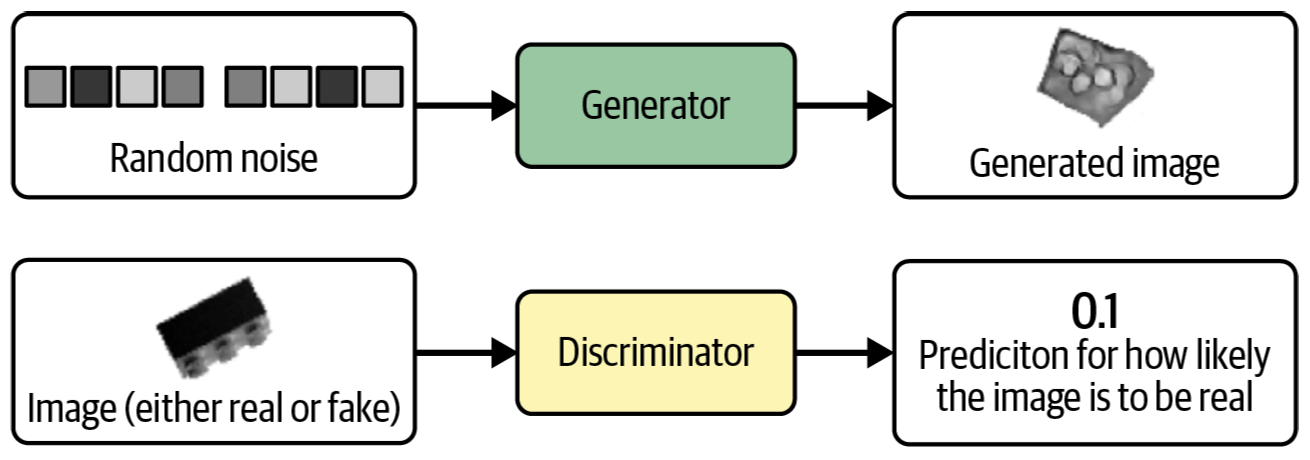

В начале процесса генератор выводит зашумленные изображения, а дискриминатор прогнозирует случайным образом. Ключ к GAN заключается в том, как мы чередуем обучение двух сетей, так что по мере того, как генератор более умело обманывает дискриминатор, дискриминатор должен адаптироваться, чтобы сохранить свою способность правильно определять, какие наблюдения являются фальшивыми. Это заставляет генератор искать новые способы обмануть дискриминатор, и цикл продолжается.

## Пример сверточной GAN (Deep Convolutional GAN, DCGAN) для набора LEGO Bricks 🧱

Создадим GAN в Keras, чтобы генерировать изображения кирпичей конструктора LEGO.

#### Набор данных Bricks

Сначала необходимо загрузить данные для обучения. Будем использовать набор данных `Images of LEGO Bricks`, доступный через Kaggle (https://www.kaggle.com/datasets/joosthazelzet/lego-brick-images). Это компьютерная коллекция из 40 000 фотографических изображений 50 различных игрушечных кубиков, снятых с разных ракурсов. 

In [1]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"       # "jax" "tensorflow" "torch"
#os.environ["ENABLE_PJRT_COMPATIBILITY"] = "1"   # added for jax
#os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1" # added for torch

In [2]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

In [3]:
#%load_ext autoreload
#%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import keras
keras.__version__, keras.backend.backend()

('3.9.2', 'tensorflow')

In [4]:
from keras import (
    layers,
    models,
    callbacks,
    losses,
    utils,
    metrics,
    optimizers,
)
import tensorflow as tf
tf.__version__

'2.18.0'

In [5]:
from utils import display, sample_batch

## Параметры

In [6]:
IMAGE_SIZE = 64
CHANNELS = 1
BATCH_SIZE = 128
Z_DIM = 100
EPOCHS = 100
LOAD_MODEL = False
ADAM_BETA_1 = 0.5
ADAM_BETA_2 = 0.999
LEARNING_RATE = 0.0002
NOISE_PARAM = 0.1

## Подготовка данных

Нужно загрузить набор данных на локальный диск и использовать функцию Keras `image_dataset_from_directory` для создания набора данных TensorFlow по ссылке на каталог, в котором хранятся изображения. Это позволяет считывать пакеты изображений в память только тогда, когда это необходимо (например, во время обучения), так что мы можем работать с большими наборами данных и не беспокоиться о необходимости размещения всего набора данных в памяти. Здесь также изменяется размер изображений до 64 × 64, интерполируя значения пикселей.

In [7]:
train_data = utils.image_dataset_from_directory(
    "lego-brick-images/dataset/",
    labels=None,
    color_mode="grayscale",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    interpolation="bilinear",
)

Found 0 files.


ValueError: No images found in directory lego-brick-images/dataset/. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

Исходные данные масштабированы в диапазоне [0, 255] для обозначения интенсивности пикселей. При обучении GAN мы масштабируем данные в диапазон [–1, 1], чтобы мы могли использовать функцию активации `tanh` на последнем слое генератора, которая имеет тенденцию обеспечивать более сильные градиенты, чем сигмоида.

In [ ]:
def preprocess(img):
    """
    Normalize and reshape the images
    """
    img = (keras.ops.cast(img, "float32") - 127.5) / 127.5
    return img


train = train_data.map(lambda x: preprocess(x))

In [ ]:
train_sample = sample_batch(train)

In [ ]:
display(train_sample)

## Построение GAN 

### Дискриминатор

Цель дискриминатора — предсказать, является ли изображение реальным или поддельным. Это задача классификации изображений с учителем, поэтому мы можем использовать архитектуру, аналогичную той, с которой мы работали ранее: сложенные в стек сверточные слои с одним выходным узлом.

Полная архитектура дискриминатора GAN показана ниже.

In [ ]:
discriminator_input = layers.Input(
    shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
)
x = layers.Conv2D(
    64, kernel_size=4, strides=2, padding="same", use_bias=False
)(discriminator_input)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(
    128, kernel_size=4, strides=2, padding="same", use_bias=False
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(
    256, kernel_size=4, strides=2, padding="same", use_bias=False
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(
    512, kernel_size=4, strides=2, padding="same", use_bias=False
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(
    1, kernel_size=4, strides=1, padding="valid", use_bias=False,
    activation="sigmoid",
)(x)
discriminator_output = layers.Flatten()(x)

discriminator = models.Model(discriminator_input, discriminator_output)
discriminator.summary()

Здесь входной слой дискриминатора определен для работы с изображениями.

Слои `Conv2D` располагаются друг над другом, а между ними располагаются слои пакетной нормализации `BatchNormalization`, активации `LeakyReLU` и `Dropout`.

Последний сверточный слой выпрямлен (слой `Flatten`) — к этому моменту форма тензора равна 1 × 1 × 1, поэтому нет необходимости в финальном слое `Dense`.

Модель Keras, определяющая дискриминатор — модель, которая принимает входное изображение и выводит одно число от 0 до 1.

Обратите внимание, что мы используем шаг 2 в некоторых слоях `Conv2D`, чтобы уменьшить пространственную форму тензора при его прохождении через сеть (64 в исходном изображении, затем 32, 16, 8, 4 и, наконец, 1), в то же время увеличивая количество каналов (1 во входном изображении в оттенках серого, затем 64, 128, 256 и, наконец, 512) перед свертыванием до одного прогнозного значения.

Мы используем активацию сигмоидой на последнем слое `Conv2D` для вывода числа от 0 до 1.

### Генератор

Входными данными для генератора будет вектор, полученный из многомерного стандартного нормального распределения. Выходными данными является изображение того же размера, что и изображение в исходных обучающих данных.

Это описание напоминает декодер в вариационном автокодировщике. Фактически, генератор GAN выполняет ту же задачу, что и декодер VAE: преобразование вектора в скрытом пространстве в изображение. Концепция отображения скрытого пространства обратно в исходную область очень распространена в генеративном моделировании, поскольку она дает нам возможность манипулировать векторами в скрытом пространстве для изменения высокоуровневых функций изображений в исходной области.

Архитектура генератора GAN показана ниже.

In [ ]:
generator_input = layers.Input(shape=(Z_DIM,))
x = layers.Reshape((1, 1, Z_DIM))(generator_input)
x = layers.Conv2DTranspose(
    512, kernel_size=4, strides=1, padding="valid", use_bias=False
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Conv2DTranspose(
    256, kernel_size=4, strides=2, padding="same", use_bias=False
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Conv2DTranspose(
    128, kernel_size=4, strides=2, padding="same", use_bias=False
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Conv2DTranspose(
    64, kernel_size=4, strides=2, padding="same", use_bias=False
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
generator_output = layers.Conv2DTranspose(
    CHANNELS, kernel_size=4, strides=2, padding="same", use_bias=False,
    activation="tanh",
)(x)
generator = models.Model(generator_input, generator_output)
generator.summary()

Входной слой генератора соответствует размерности скрытого пространства Z_DIM.

Используется слой `Reshape`, чтобы создать тензор формы 1 × 1 × 100, чтобы иметь возможносит применять сверточные операции транспонирования.

Поток данных пропускается через четыре слоя `Conv2DTranspose` с помощью слоев `BatchNormalization` 
и `LeakyReLU`, расположенных между ними.

Последний слой `Conv2DTranspose` использует функцию активации `tanh` для преобразования
выходных значений в диапазон [–1, 1], чтобы соответствовать исходной области значений изображения.

Модель Keras, определяющая генератор — это модель, которая принимает вектор длины Z_DIM и выводит тензор формы [64, 64, 1].

Мы используем шаг 2 в некоторых слоях Conv2DTranspose, чтобы увеличить пространственную форму тензора при его прохождении через сеть (1 в исходном векторе, затем 4, 8, 16, 32 и, наконец, 64), одновременно уменьшая количество каналов (512, затем 256, 128, 64 и, наконец, 1, чтобы соответствовать выходному сигналу в оттенках серого).

## Обучение GAN

Архитектура генератора и дискриминатора в DCGAN очень проста и не так уж сильно отличается от моделей VAE. Ключ к пониманию GAN лежит в понимании процесса обучения генератора и дискриминатора.

Мы можем обучить дискриминатор, создав обучающий набор, в котором некоторые изображения являются реальными наблюдениями из обучающего набора, а некоторые — поддельными выходными данными от генератора. Затем мы рассматриваем это как задачу обучения с учителем, где метки равны 1 для реальных изображений и 0 для поддельных изображений, с бинарной кросс-энтропией в качестве функции потерь.

Как нам следует обучать генератор? Нам нужно найти способ оценки каждого сгенерированного изображения, чтобы его можно было оптимизировать для получения изображений с высокой оценкой. К счастью, у нас есть дискриминатор, который делает именно это! Мы можем сгенерировать пакет изображений и пропустить их через дискриминатор, чтобы получить оценку для каждого изображения. Тогда функция потерь для генератора представляет собой просто бинарную перекрестную энтропию между этими вероятностями и вектором единиц, поскольку мы хотим обучить генератор генерировать изображения, которые дискриминатор считает реальными.

Крайне важно, чтобы мы чередовали обучение этих двух сетей, следя за тем, чтобы мы обновляли веса только одной сети за раз. Например, в процессе обучения генератора обновляются только веса генератора. Если бы мы позволили также изменять веса дискриминатора, то дискриминатор просто настроился бы так, чтобы с большей вероятностью предсказать, что сгенерированные изображения будут реальными, что не является желаемым результатом. Мы хотим, чтобы сгенерированные изображения прогнозировались близко к 1 (реальному), потому что генератор сильный, а не потому, что дискриминатор слабый.

Схема процесса обучения дискриминатора и генератора представлена на рисунке ниже.

<!-- img src="06_gan1_02_discr.pdf" width=600 -->

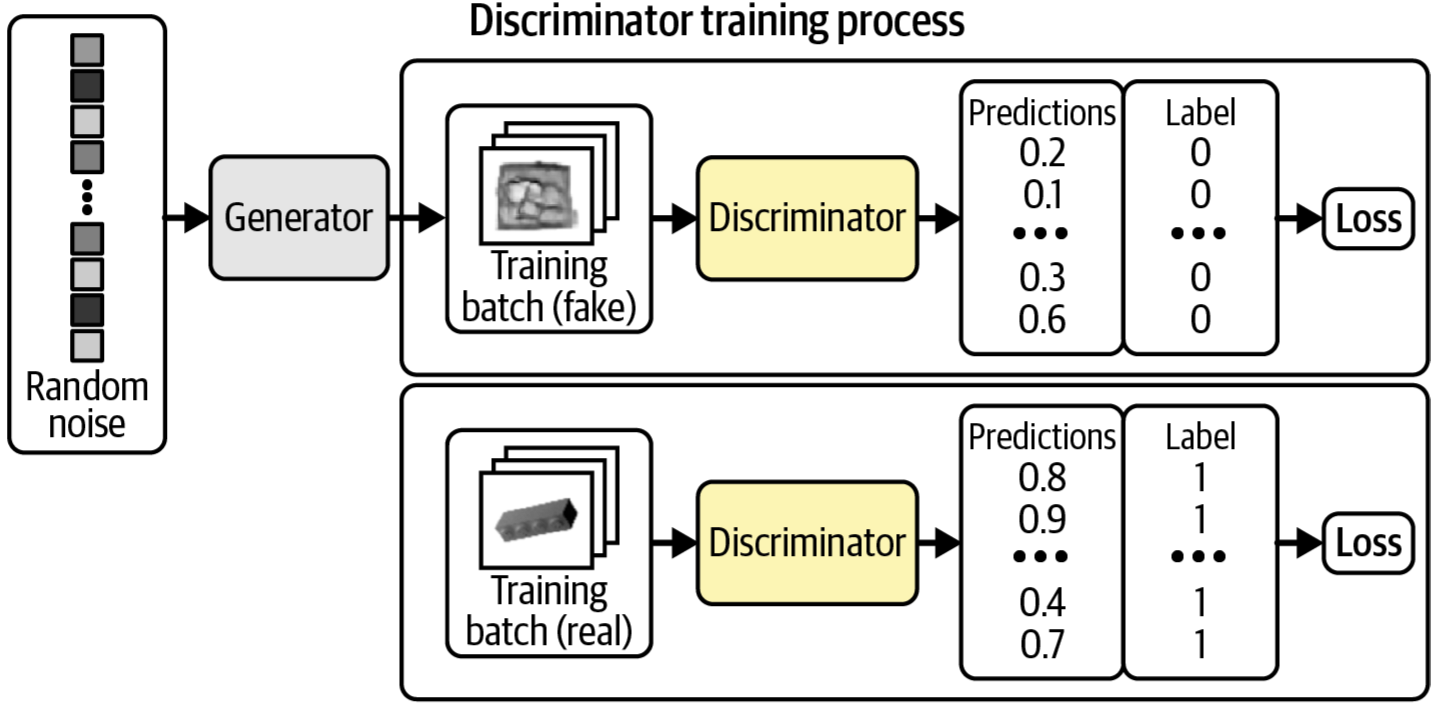

<!-- img src="06_gan1_02_gener.pdf" width=600 -->

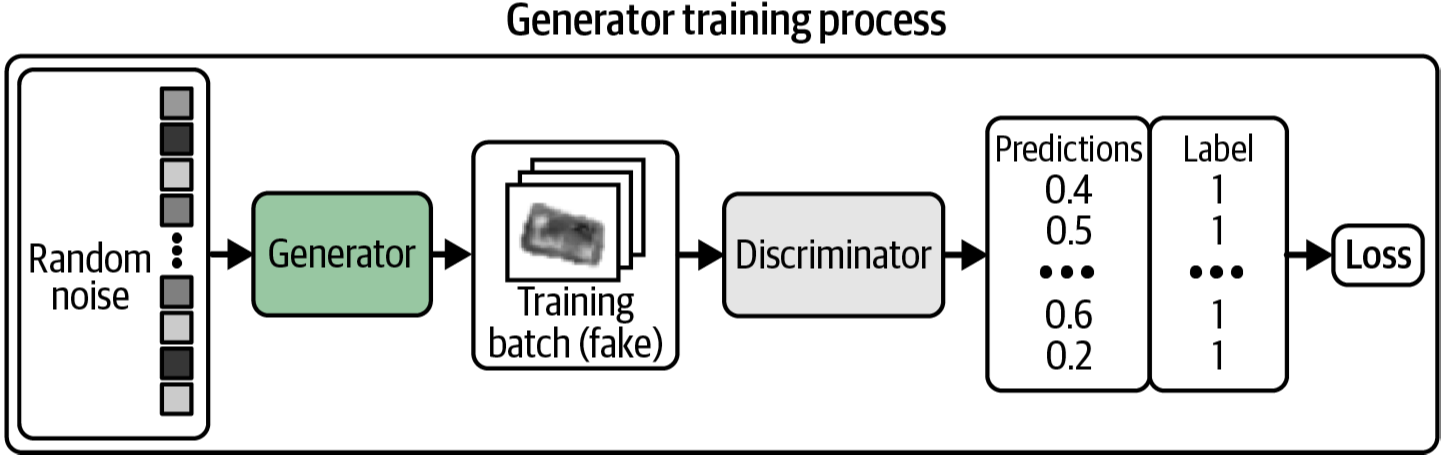

Здесь серые прямоугольники обозначают, что веса фиксируются во время обучения.

Keras предоставляет нам возможность создать собственную функцию `train_step` для реализации этой логики. Ниже показан полный класс модели `DCGAN`.

In [ ]:
class DCGAN(models.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(DCGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer):
        super(DCGAN, self).compile()
        self.loss_fn = losses.BinaryCrossentropy()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_metric = metrics.Mean(name="d_loss")
        self.d_real_acc_metric = metrics.BinaryAccuracy(
            name="d_real_acc")
        self.d_fake_acc_metric = metrics.BinaryAccuracy(
            name="d_fake_acc")
        self.d_acc_metric = metrics.BinaryAccuracy(name="d_acc")
        self.g_loss_metric = metrics.Mean(name="g_loss")
        self.g_acc_metric = metrics.BinaryAccuracy(name="g_acc")

    @property
    def metrics(self):
        return [
            self.d_loss_metric,
            self.d_real_acc_metric,
            self.d_fake_acc_metric,
            self.d_acc_metric,
            self.g_loss_metric,
            self.g_acc_metric,
        ]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = keras.ops.shape(real_images)[0]
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim)
        )

        # Train the discriminator on fake images
        with tf.GradientTape() as gen_tape, \
             tf.GradientTape() as disc_tape:
            generated_images = self.generator(
                random_latent_vectors, training=True
            )
            real_predictions = self.discriminator(
                real_images, training=True
            )
            fake_predictions = self.discriminator(
                generated_images, training=True
            )

            real_labels = keras.ops.ones_like(real_predictions)
            real_noisy_labels = real_labels + \
                NOISE_PARAM * keras.random.uniform(
                keras.ops.shape(real_predictions)
            )
            fake_labels = keras.ops.zeros_like(fake_predictions)
            fake_noisy_labels = fake_labels - \
                NOISE_PARAM * keras.random.uniform(
                keras.ops.shape(fake_predictions)
            )

            d_real_loss = self.loss_fn(real_noisy_labels, 
                                       real_predictions)
            d_fake_loss = self.loss_fn(fake_noisy_labels, 
                                       fake_predictions)
            d_loss = (d_real_loss + d_fake_loss) / 2.0

            g_loss = self.loss_fn(real_labels, fake_predictions)

        gradients_of_discriminator = disc_tape.gradient(
            d_loss, self.discriminator.trainable_variables
        )
        gradients_of_generator = gen_tape.gradient(
            g_loss, self.generator.trainable_variables
        )

        self.d_optimizer.apply_gradients(
            zip(gradients_of_discriminator, 
                discriminator.trainable_variables)
        )
        self.g_optimizer.apply_gradients(
            zip(gradients_of_generator, 
                generator.trainable_variables)
        )

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.d_real_acc_metric.update_state(real_labels, 
                                            real_predictions)
        self.d_fake_acc_metric.update_state(fake_labels, 
                                            fake_predictions)
        self.d_acc_metric.update_state(
            [real_labels, fake_labels], 
            [real_predictions, fake_predictions]
        )
        self.g_loss_metric.update_state(g_loss)
        self.g_acc_metric.update_state(real_labels, fake_predictions)

        return {m.name: m.result() for m in self.metrics}

Функция потерь для генератора и дискриминатора — это `BinaryCrossentropy`.

Чтобы обучить нейронную сеть, сначала выбирается пакет векторов из многомерного стандартного нормального распределения, который 
затем пропускается через генератор, чтобы создать пакет сгенерированных изображений.

Затем дискриминатор предсказывает реальность пакета реальных изображений и пакета сгенерированных изображений.

Потери дискриминатора — это средняя бинарная кросс-энтропия как для реальных изображений (с меткой 1), так и для синтетических изображений (с меткой 0).

Потери генератора — это бинарная кросс-энтропия между предсказаниями дискриминатора для сгенерированных изображений и меткой 1.

Веса дискриминатора и генератора обновляются по отдельности.

In [ ]:
# Create a DCGAN
dcgan = DCGAN(
    discriminator=discriminator, generator=generator, latent_dim=Z_DIM
)

In [ ]:
if LOAD_MODEL:
    dcgan.load_weights("./checkpoint/checkpoint.ckpt")

In [ ]:
dcgan.compile(
    d_optimizer=optimizers.Adam( #legacy.
        learning_rate=LEARNING_RATE, 
        beta_1=ADAM_BETA_1, 
        beta_2=ADAM_BETA_2
    ),
    g_optimizer=optimizers.Adam( #legacy.
        learning_rate=LEARNING_RATE, 
        beta_1=ADAM_BETA_1, 
        beta_2=ADAM_BETA_2
    ),
)

In [ ]:
import os
# Create subdirectories
for path in ["./checkpoint","./logs","./models","./output"]:
    try:
        os.mkdir(path)
        print("Directory '%s' created successfully" % path)
    except OSError as error:
        print("Directory '%s' exists" % path)

In [ ]:
# Create a model save checkpoint
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath="./checkpoint/checkpoint.weights.h5",
    save_weights_only=True,
    save_freq="epoch",
    verbose=0,
)

tensorboard_callback = callbacks.TensorBoard(log_dir="./logs")


class ImageGenerator(callbacks.Callback):
    def __init__(self, num_img, latent_dim):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(
            shape=(self.num_img, self.latent_dim)
        )
        generated_images = self.model.generator(random_latent_vectors)
        generated_images = generated_images * 127.5 + 127.5
        generated_images = generated_images.numpy()
        display(
            generated_images,
            save_to="./output/generated_img_%03d.png" % (epoch),
        )

In [ ]:
dcgan_history = dcgan.fit(
    train,
    epochs=EPOCHS,
    callbacks=[
#        model_checkpoint_callback,
        tensorboard_callback,
        ImageGenerator(num_img=10, latent_dim=Z_DIM),
    ],
)

In [ ]:
dcgan_history.history.keys()

In [ ]:
plt.figure(figsize=(12, 7))

for i,param in enumerate(['d_acc', 'd_loss', 'g_acc', 'g_loss']):
    plt.subplot(2, 2, i+1)
    plt.plot(dcgan_history.history[param], label=param)
    plt.legend()
    plt.grid(True)

Дискриминатор и генератор постоянно борются за доминирование, что может сделать процесс обучения DCGAN нестабильным. В идеале процесс обучения найдет равновесие, которое позволит генератору получить значимую информацию от дискриминатора, и качество изображений начнет улучшаться. После достаточного количества эпох дискриминатор имеет тенденцию к доминированию, как показано на рисунке ниже, но это может не быть проблемой, поскольку к этому моменту генератор, возможно, уже научился создавать изображения достаточно высокого качества.

<img src="06_gan1_03.pdf" width=600>

#### Добавление шума к меткам

Полезным приемом при обучении GAN является добавление небольшого количества случайного шума к обучающим меткам. Это помогает повысить стабильность процесса обучения и повысить резкость генерируемых изображений. Такое сглаживание меток действует как способ приручить дискриминатор, чтобы перед ним стояла более сложная задача и он не перегружал генератор.

In [ ]:
# Save the final models
generator.save("./models/generator.keras")
discriminator.save("./models/discriminator.keras")

## Создание новых изображений

Наблюдая за изображениями, создаваемыми генератором в определенные периоды обучения (см. выше), становится ясно, что генератор становится все более искусным в создании изображений, которые можно было бы извлечь из обучающего набора.

In [ ]:
# Sample some points in the latent space, 
# from the standard normal distribution
grid_width, grid_height = (10, 3)
z_sample = np.random.normal(size=(grid_width*grid_height,Z_DIM))

In [ ]:
# Decode the sampled points
reconstructions = generator.predict(z_sample)

In [ ]:
# Draw a plot of decoded images
fig = plt.figure(figsize=(18, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Output the grid of faces
for i in range(grid_width * grid_height):
    ax = fig.add_subplot(grid_height, grid_width, i + 1)
    ax.axis("off")
    ax.imshow(reconstructions[i, :, :], cmap="Greys")

В каком-то смысле удивительно, что нейронная сеть способна преобразовывать случайный шум во что-то значимое. Стоит помнить, что мы не предоставили модели никаких дополнительных функций, кроме необработанных пикселей, поэтому ей приходится самостоятельно разрабатывать концепции высокого уровня, такие как рисование теней, кубов и кругов.

Еще одним требованием успешной генеративной модели является то, что она не просто воспроизводит изображения из обучающего набора. Чтобы проверить это, мы можем найти изображение из обучающего набора, наиболее близкое к конкретному сгенерированному примеру. Хорошей мерой расстояния является расстояние `L1`, определяемое как:

In [ ]:
def compare_images(img1, img2):
    return np.mean(np.abs(img1 - img2))

In [ ]:
all_data = []
for i in train.as_numpy_iterator():
    all_data.extend(i)
all_data = np.array(all_data)

In [ ]:
r, c = 3, 5
fig, axs = plt.subplots(r, c, figsize=(10, 6))
fig.suptitle("Generated images", fontsize=20)

noise = np.random.normal(size=(r * c, Z_DIM))
gen_imgs = generator.predict(noise)

cnt = 0
for i in range(r):
    for j in range(c):
        axs[i, j].imshow(gen_imgs[cnt], cmap="gray_r")
        axs[i, j].axis("off")
        cnt += 1

plt.show()

На рисунке ниже показаны ближайшие наблюдения в обучающем наборе для выборки сгенерированных изображений. Мы видим, что, хотя между сгенерированными изображениями и обучающим набором существует некоторая степень сходства, они не идентичны. Это показывает, что генератор понял эти высокоуровневые функции и может генерировать примеры, отличные от тех, которые он уже видел.

In [ ]:
fig, axs = plt.subplots(r, c, figsize=(10, 6))
fig.suptitle("Closest images in the training set", fontsize=20)

cnt = 0
for i in range(r):
    for j in range(c):
        c_diff = 99999
        c_img = None
        for k_idx, k in enumerate(all_data):
            diff = compare_images(gen_imgs[cnt], k)
            if diff < c_diff:
                c_img = np.copy(k)
                c_diff = diff
        axs[i, j].imshow(c_img, cmap="gray_r")
        axs[i, j].axis("off")
        cnt += 1

plt.show()

## Задание

Построить и обучить GAN для набора данных MNIST (`tf.keras.datasets.mnist`) со скрытым (латентным) пространством размерности 2. Использовать для обучения GAN обучающую часть набора данных MNIST.

Для случайного набора точек латентного пространства:
* Построить и визуализировать образы случайных значений 
* Найти и визуализировать изображения в MNIST, наиболее близкие к сгенерированным образам